#Boosting Techniques

Q1. What is Boosting in Machine Learning?

  ->> Boosting is a method of combining multiple models (usually decision trees) to create a more accurate and robust predictive model.

 - Each new model focuses on correcting the errors made by the previous ones.

 - It’s an iterative process where the models learn from each other’s mistakes.

 - The final prediction is made by combining the outputs of all the individual models (often through weighted voting or averaging).


Q2.How does Boosting differ from Bagging?

  ->> Boosting: Sequential learning → Learns from previous mistakes → Adjusts weights based on errors → Reduces bias → Higher overfitting risk → Examples: AdaBoost, Gradient Boosting, XGBoost


 -> Bagging: Parallel learning → Models trained independently → Uses bootstrap sampling → Reduces variance → Lower overfitting risk → Example: Random Forest

 Q3. What is the key idea behind AdaBoost?

  ->> Focus on the mistakes. Improve on them. Repeat.
 how it works:

 - AdaBoost combines multiple weak learners (often shallow decision trees) to build a strong classifier.

 - After each round of learning, it increases the weight of incorrectly classified data points. This means the next model will focus more on the "hard cases" the previous one got wrong.

 - It continues this iterative training, gradually assembling a collection of models that compensate for each other’s weaknesses.

 - Final predictions are made through a weighted vote, where models with better performance contribute more.

Q4. Explain the working of AdaBoost with an example.

  ->>
1. Initialize Weights
 - Start with equal weights for all training samples.

 - Suppose we have 10 fruits, each gets a weight of 0.1.

2. Train First Weak Learner
 - Train a simple model (e.g., a decision stump) on the data.

 - It might say: “If weight > 150g, then it’s an orange.”

 - It misclassifies 3 fruits.

3. Calculate Error & Model Weight
 - Error = sum of weights of misclassified samples.

 - Say error = 0.3.

 - Compute model’s weight (alpha): $$\alpha = \frac{1}{2} \log\left(\frac{1 - \text{error}}{\text{error}}\right)$$ So, alpha ≈ 0.423.

4. Update Sample Weights
 - Increase weights of misclassified samples so the next model focuses on them.

 - Decrease weights of correctly classified ones.

 - Normalize weights so they sum to 1.

5. Train Next Weak Learner
 - Train another decision stump using updated weights.

 - It might say: “If color is orange, then it’s an orange.”

 - Again, calculate error, alpha, and update weights.

6. Repeat
 - Continue this process for a set number of rounds (e.g., 50).

 - Each new model focuses more on the hard-to-classify samples.

7. Final Prediction
 - Combine all weak learners using their alpha values.

 - Final prediction is a weighted vote of all models.

Q5.What is Gradient Boosting, and how is it different from AdaBoost?

  ->> What Is Gradient Boosting?
Gradient Boosting constructs an additive model by:

 - Starting with a simple prediction (like the mean).

 - Calculating residuals (errors) from that prediction.

 - Fitting a new model to those residuals.

 - Repeating the process to minimize a loss function (e.g., mean squared error) using gradient descent.

->> how is it different from AdaBoost?

- Gradient Boosting: Fits new models to residuals → Optimizes a loss function using gradient descent → Uses deeper learners → Less sensitive to noisy data → More flexible → Widely used for regression and classification

- AdaBoost: Builds models sequentially → Adjusts weights of misclassified samples → Often uses decision stumps → More sensitive to noisy data → Simpler and faster → Primarily used for classification


Q6.What is the loss function in Gradient Boosting?

  ->> In Gradient Boosting, the loss function is the mathematical tool that guides the model to improve its predictions. It measures how far off the model’s predictions are from the actual values and helps determine the direction and magnitude of updates during training.

Q7. How does XGBoost improve over traditional Gradient Boosting?

  ->> XGBoost: Adds L1/L2 regularization → Speeds up training via parallelism → Uses smart tree pruning → Automatically handles missing data → Optimized for sparse inputs → Includes built-in cross-validation → Allows custom objectives

->> Gradient Boosting: No regularization → Slower due to sequential learning → Basic tree construction → Manual data preprocessing → Less efficient on sparse data → External cross-validation needed → Fixed objective functions

Q8.What is the difference between XGBoost and CatBoost?

  ->> XGBoost: Requires manual encoding for categorical data → Uses L1/L2 regularization → Highly tunable → Fast with parallel processing → Best for numerical datasets → Large community support

->> CatBoost: Handles categorical data natively → Uses ordered boosting to reduce overfitting → Minimal tuning needed → Fast training on mixed data → Great for datasets with categorical features → Growing ecosystem

Q9.What are some real-world applications of Boosting techniques?

  ->> 🧠 Healthcare
- Disease prediction: Early detection of conditions like cancer or diabetes using patient data.

- Medical image classification: Boosting helps identify tumors or anomalies in X-rays and MRIs.

- Personalized treatment plans: Predicting patient outcomes to tailor therapies.

💳 Finance
- Credit scoring: Assessing loan applicants’ risk profiles more accurately.

- Fraud detection: Spotting unusual transaction patterns in real time.

- Stock price prediction: Modeling complex market behaviors.

🛍️ E-commerce & Retail
- Recommendation systems: Suggesting products based on user behavior.

- Customer churn prediction: Identifying users likely to leave a service.

- Sales forecasting: Predicting future demand to optimize inventory.

Q10. How does regularization help in XGBoost?

  ->> How It Helps
- Simplifies the model: Fewer splits and smaller weights mean cleaner trees.

- Improves generalization: Performs better on new, unseen data.

- Enhances interpretability: Sparse models are easier to understand.

- Speeds up training: Less complexity means faster computation.

Q11.What are some hyperparameters to tune in Gradient Boosting models?

  ->> Tuning hyperparameters in Gradient Boosting models is essential for squeezing out top performance and avoiding overfitting.

Q12. What is the concept of Feature Importance in Boosting?

  ->> Feature Importance in Boosting refers to how much each input feature contributes to the predictive power of a model. It helps you understand which variables are driving decisions — and which ones might just be along for the ride.

Q13.Why is CatBoost efficient for categorical data?

  ->> Unlike other boosting algorithms that require manual encoding (like one-hot or label encoding), CatBoost processes categorical features directly.

- It uses Ordered Target Encoding, which avoids target leakage by encoding categories based only on past data during training.

- This means no preprocessing headaches and better generalization

In [1]:
#14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 83.67%


In [3]:
#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train AdaBoost Regressor
model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 69.21


Feature Importance:
                    Feature  Importance
7       mean concave points    0.434897
27     worst concave points    0.273841
22          worst perimeter    0.050974
23               worst area    0.047995
21            worst texture    0.047193
20             worst radius    0.045435
26          worst concavity    0.022999
1              mean texture    0.018393
16          concavity error    0.015558
10             radius error    0.010003
13               area error    0.005478
24         worst smoothness    0.004507
15        compactness error    0.004384
17     concave points error    0.003404
12          perimeter error    0.002045
18           symmetry error    0.001845
5          mean compactness    0.001712
11            texture error    0.001303
28           worst symmetry    0.001284
6            mean concavity    0.001199
29  worst fractal dimension    0.001087
25        worst compactness    0.001012
4           mean smoothness    0.000926
9    mean fractal di

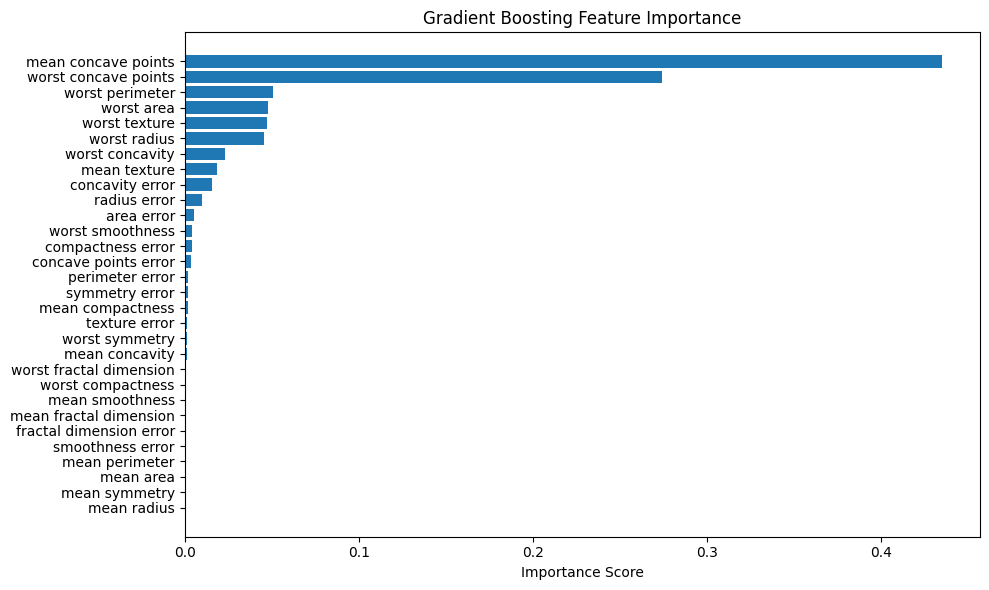

In [4]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Print feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [5]:
#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.9137


In [6]:
#18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Step 4: Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Step 5: Compare Accuracy
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 95.91%
XGBoost Accuracy: 95.32%


In [26]:
#19. Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Step 1: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using F1-Score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.2f}")


F1-Score: 0.99


In [10]:
#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate using MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 3272.33


Feature Importance:
                    Feature  Importance
27     worst concave points    0.130449
21            worst texture    0.107215
23               worst area    0.099632
26          worst concavity    0.079014
7       mean concave points    0.072729
1              mean texture    0.071916
15        compactness error    0.070313
10             radius error    0.063204
28           worst symmetry    0.052233
13               area error    0.045851
22          worst perimeter    0.023429
18           symmetry error    0.022289
4           mean smoothness    0.022021
20             worst radius    0.021891
8             mean symmetry    0.020892
12          perimeter error    0.020092
24         worst smoothness    0.018671
5          mean compactness    0.018256
3                 mean area    0.018207
14         smoothness error    0.011478
19  fractal dimension error    0.010222
0               mean radius    0.000000
11            texture error    0.000000
9    mean fractal di

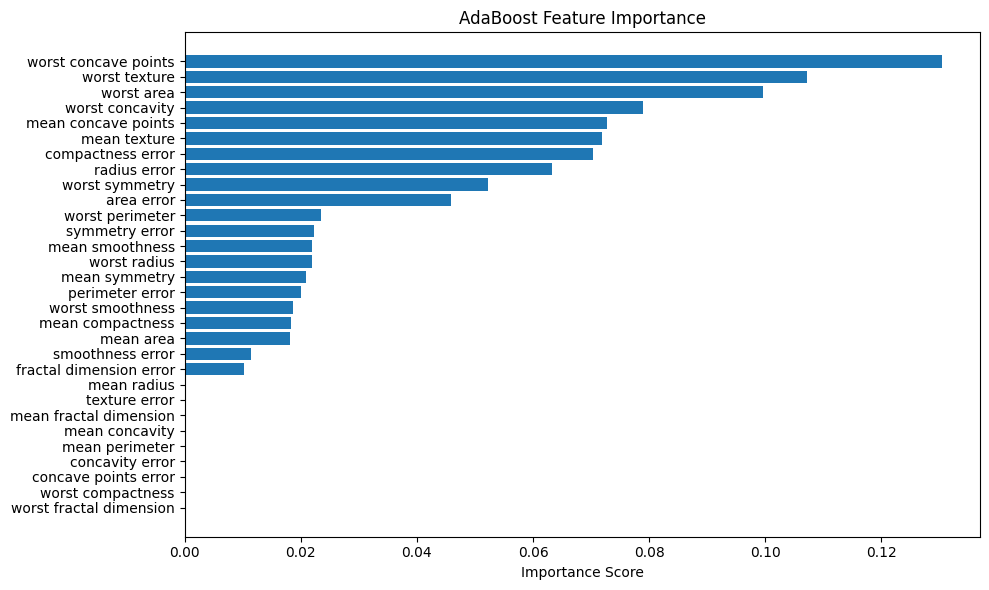

In [11]:
#21. Train an AdaBoost Classifier and visualize feature importance

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract and visualize feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Optional: Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("AdaBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


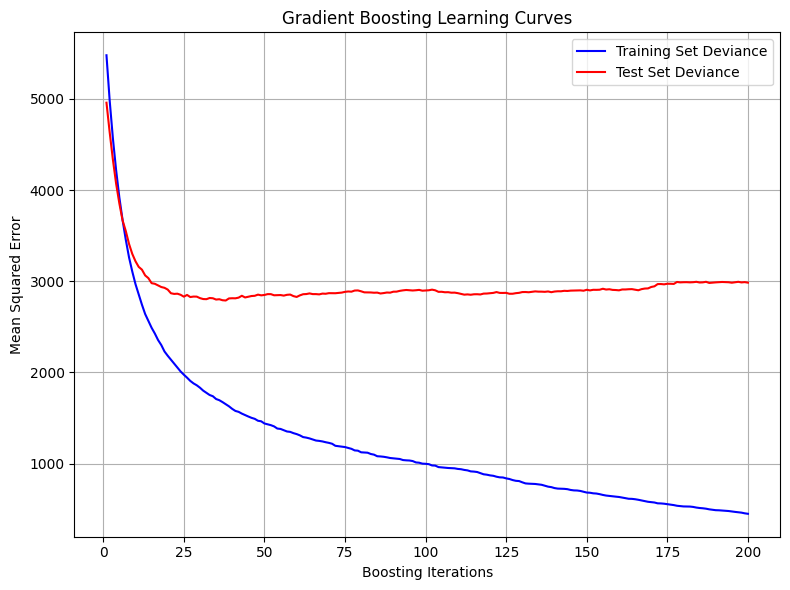

In [12]:
#22. Train a Gradient Boosting Regressor and plot learning curves

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load a regression dataset
data = load_diabetes()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Track test set deviance over iterations
test_score = np.zeros((model.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

# Step 5: Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(np.arange(model.n_estimators) + 1, model.train_score_, label='Training Set Deviance', color='blue')
plt.plot(np.arange(model.n_estimators) + 1, test_score, label='Test Set Deviance', color='red')
plt.xlabel('Boosting Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Learning Curves')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

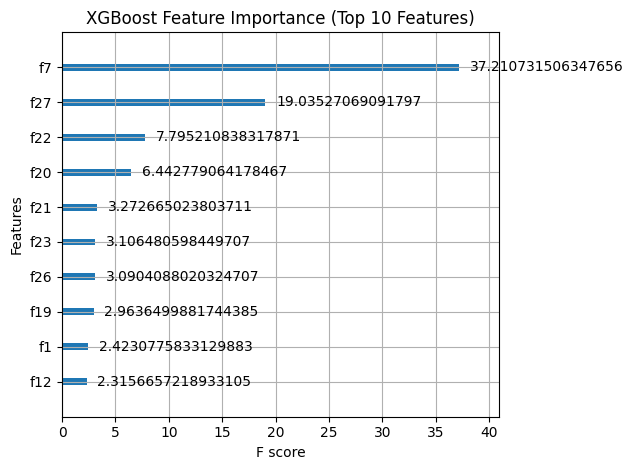

In [13]:
#23.Train an XGBoost Classifier and visualize feature importance

from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train XGBoost Classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                      use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Visualize feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance (Top 10 Features)")
plt.tight_layout()
plt.show()


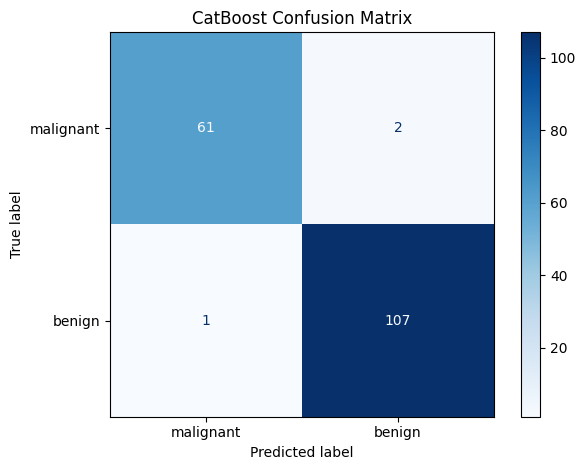

In [25]:
#24. Train a CatBoost Classifier and plot the confusion matrix

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train CatBoost Classifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Step 4: Predict and compute confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Step 5: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost Confusion Matrix")
plt.tight_layout()
plt.show()


n_estimators = 10 → Accuracy: 97.66%
n_estimators = 50 → Accuracy: 97.08%
n_estimators = 100 → Accuracy: 97.08%
n_estimators = 150 → Accuracy: 97.66%
n_estimators = 200 → Accuracy: 98.25%


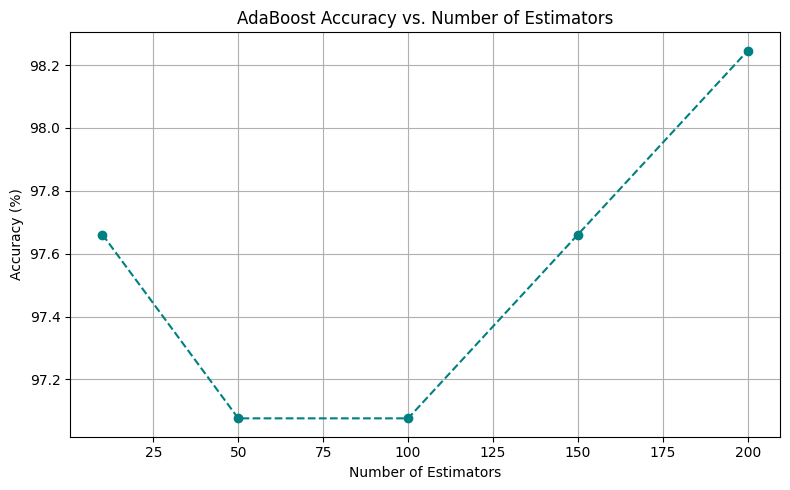

In [15]:
#25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Try different numbers of estimators
estimator_range = [10, 50, 100, 150, 200]
accuracies = []

for n in estimator_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n} → Accuracy: {acc * 100:.2f}%")

# Step 4: Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(estimator_range, [a * 100 for a in accuracies], marker='o', linestyle='--', color='teal')
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


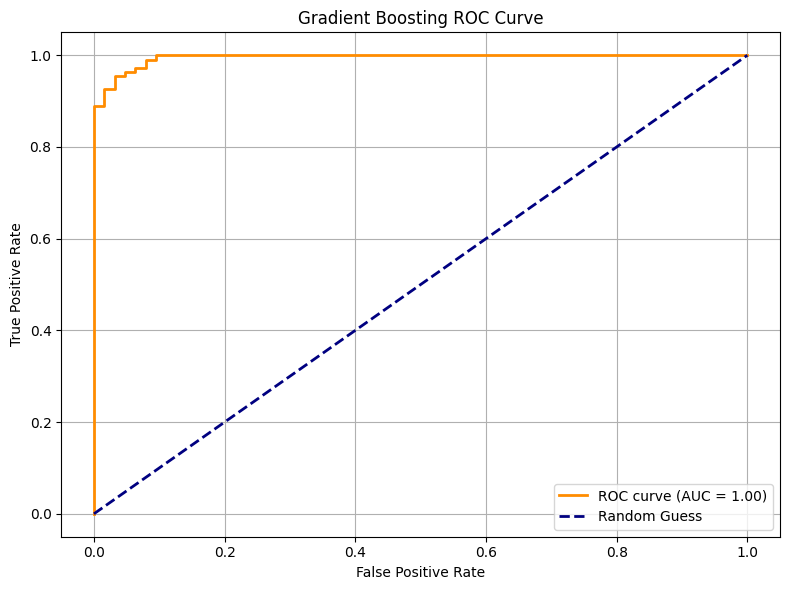

In [16]:
#26.Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define the model and parameter grid
model = XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# Step 4: Use GridSearchCV to find the best learning rate
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Learning Rate: {grid_search.best_params_['learning_rate']}")
print(f"Mean Squared Error: {mse:.2f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.2
Mean Squared Error: 2576.53


In [24]:
#28. Train a CatBoost Classifier on Tan imbalanced dataset and compare performance with class weighting

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, weights=[0.9, 0.1], flip_y=0,
                           random_state=42)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3a: Train CatBoost without class weighting
model_plain = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0)
model_plain.fit(X_train, y_train)
y_pred_plain = model_plain.predict(X_test)

# Step 3b: Train CatBoost with class weighting
model_weighted = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6,
                                    class_weights=[1, 9], verbose=0)  # 9:1 imbalance
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

# Step 4: Compare performance
print("Without Class Weights:")
print(classification_report(y_test, y_pred_plain))

print("\nWith Class Weights:")
print(classification_report(y_test, y_pred_weighted))


Without Class Weights:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       275
           1       0.75      0.24      0.36        25

    accuracy                           0.93       300
   macro avg       0.84      0.62      0.66       300
weighted avg       0.92      0.93      0.91       300


With Class Weights:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       275
           1       0.83      0.40      0.54        25

    accuracy                           0.94       300
   macro avg       0.89      0.70      0.76       300
weighted avg       0.94      0.94      0.93       300



Learning Rate = 0.01 → Accuracy: 94.74%
Learning Rate = 0.1 → Accuracy: 95.91%
Learning Rate = 0.5 → Accuracy: 96.49%
Learning Rate = 1.0 → Accuracy: 97.08%


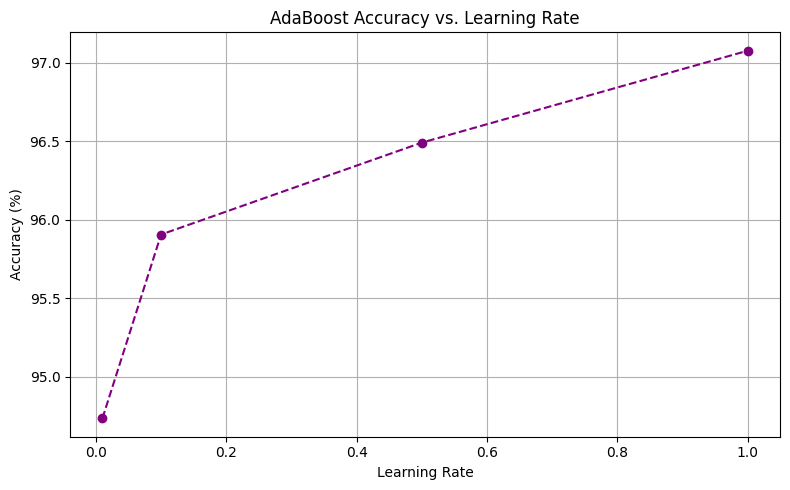

In [20]:
#29. Train an AdaBoost Classifier and analyze the effect of different learning rates

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define learning rates to test
learning_rates = [0.01, 0.1, 0.5, 1.0]
accuracies = []

# Step 4: Train AdaBoost with each learning rate
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate = {lr} → Accuracy: {acc * 100:.2f}%")

# Step 5: Plot results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, [a * 100 for a in accuracies], marker='o', linestyle='--', color='purple')
plt.title("AdaBoost Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.Java + DS


from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Step 1: Create a synthetic multi-class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train XGBoost Classifier with multi-class objective
model = XGBClassifier(objective='multi:softprob', num_class=3,
                      eval_metric='mlogloss', use_label_encoder=False,
                      n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities and evaluate log-loss
y_pred_proba = model.predict_proba(X_test)
mlogloss = log_loss(y_test, y_pred_proba)

print(f"Multi-Class Log Loss: {mlogloss:.4f}")


Multi-Class Log Loss: 0.1868


In [23]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
